In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
fig1_ht <- 5
fig1_wd <- 6

In [4]:
load(paste0(dirs$figures_dir, "/saved_obj/unified_uterine_endometrial_data_mat_de_bplots.RData"))
load(paste0(dirs$figures_dir, "/saved_obj/unified_uterine_endometrial_data_mat_sig_bplots.RData"))

In [100]:
hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

hide_axis_text <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.text.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.text.y = element_blank())
    }
    plt
}

set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

adj_axis_text <- function(plt, angle = 0) {
    plt + theme(axis.text.x = element_text(angle = angle, vjust = angle * 0.022))
}

change_axis_title <- function(plt, text) {
    plt + labs(y = text)
}

In [102]:
bp_list <- c(
    mget("UCEC_mat_de_bplot") %>% 
        purrr::map(function(p) { hide_axis_text(p, "x") }),
    mget("UCEC_mat_sig_bplot") %>%
        purrr::map(function(p) { adj_axis_text(p, angle = 45) })
) %>%
    purrr::map(hide_legend) %>%
#     purrr::map(function(p) { hide_axis_title(p, axis = "y") }) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) }) %>%
    purrr::map(function(p) { change_axis_title(p, "Gene count") })
    


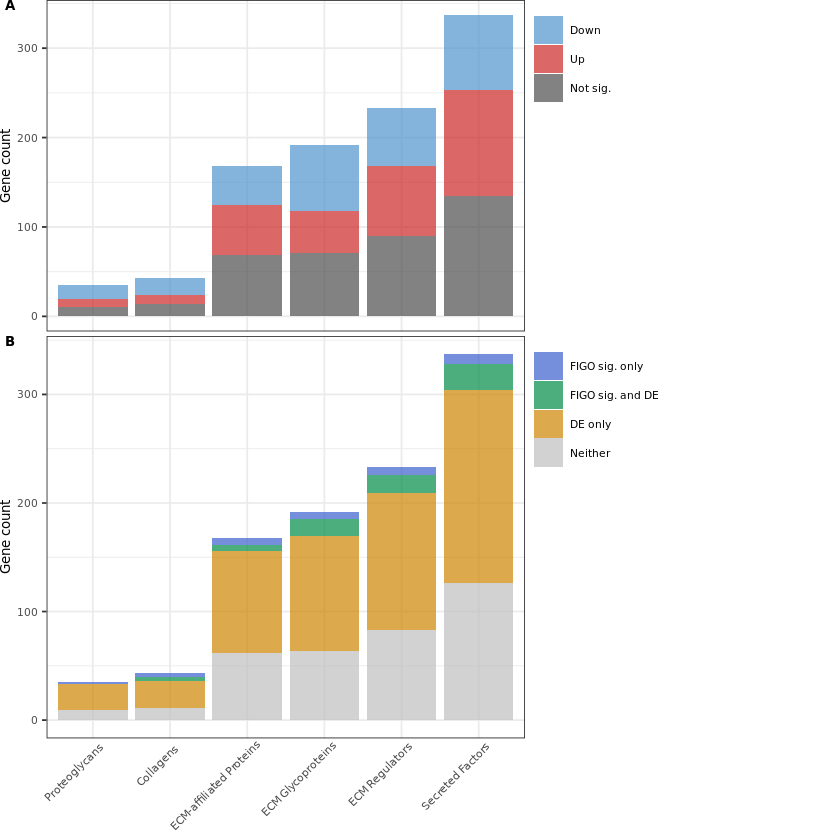

In [114]:
g1 <- plot_grid(
    bp_list[[1]],
    get_legend(bp_list[[1]] + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.justification = c(0,1))),
    rel_widths = c(1, 0.6)
)
g2 <- plot_grid(
    bp_list[[2]],
    get_legend(bp_list[[2]] + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"), legend.justification = c(0,1))),
    rel_widths = c(1, 0.6)
)
fig <- plot_grid(
    g1,
    g2,
    nrow = 2,
    align = "vh",
    rel_heights = c(1, 1.5),
    labels = c("A", "B"),
    label_size = 8,
    vjust = 1
)
fig

In [115]:
ggsave(fig, filename = paste0(dirs$figures_dir, "/one_off/ucec_grant_fig.png"), dpi = dpi, height = 3, width = 3)